In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Display the first five records of data
df=pd.read_csv('Task 3.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
#Display the first few records of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
#Display the columns of data
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
#Dissplay the data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
#Display the number of missing values in the dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#For selecting categorical columns
cat_cols=[col for col in df.columns if df[col].dtype == 'object']
print(cat_cols)

#For selecting numerical columns
num_cols=[col for col in df.columns if df[col].dtype != 'object']
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


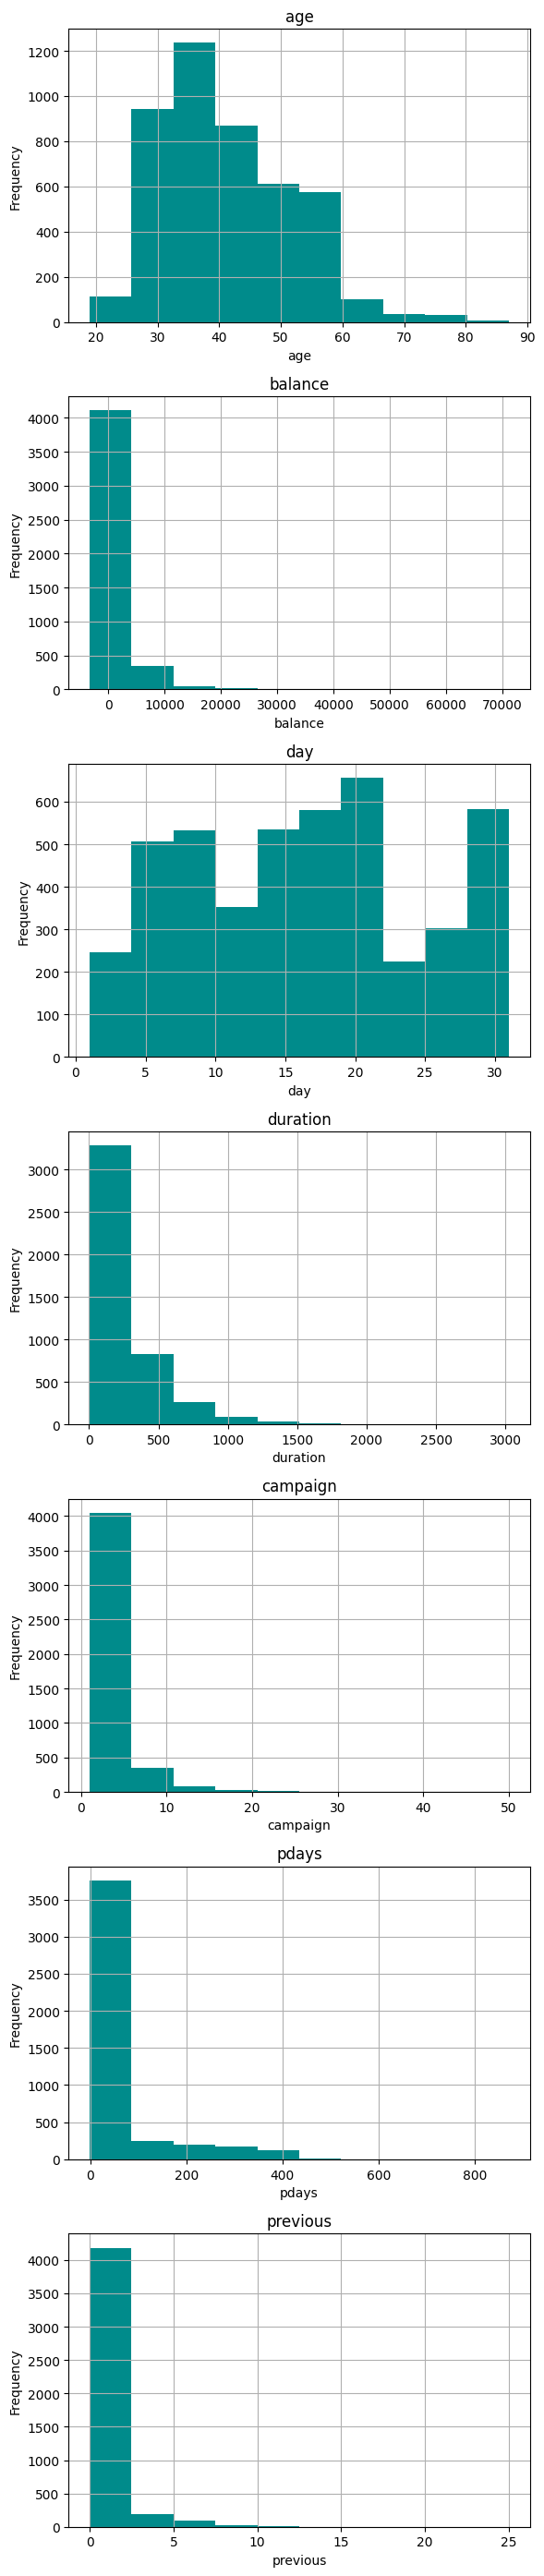

In [7]:
numerical_cols=['age','balance','day','duration','campaign','pdays','previous']
num_cols=len(numerical_cols)
fig, axes=plt.subplots(nrows=num_cols,figsize=(6,4 * num_cols))
for ax, col in zip(axes,numerical_cols):
    df[col].hist(ax=ax,color='#008b8b')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

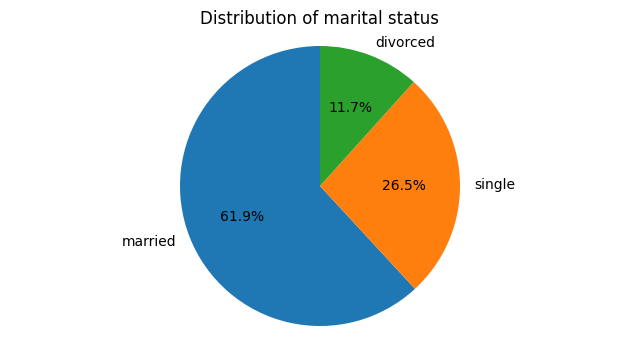

In [8]:
counts=df['marital'].value_counts()
plt.figure(figsize=(8,4))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of marital status')
plt.axis('equal')
plt.show()

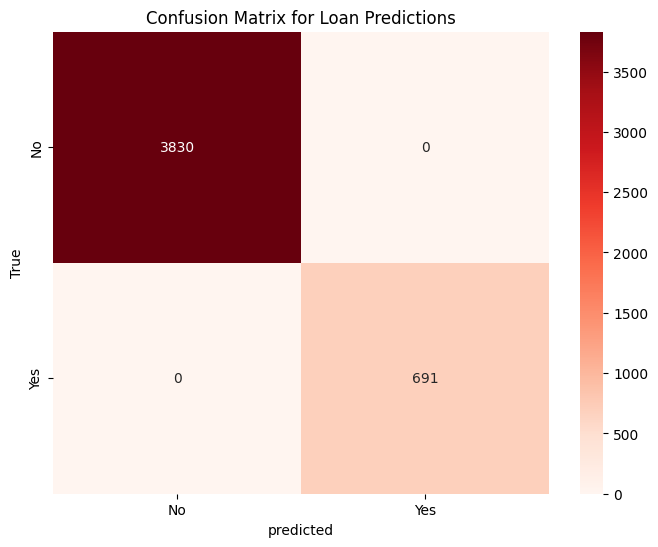

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
true_labels=df['loan']
predicted_labels = df['loan']
cm=confusion_matrix(true_labels,predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Loan Predictions')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

<Axes: xlabel='housing', ylabel='count'>

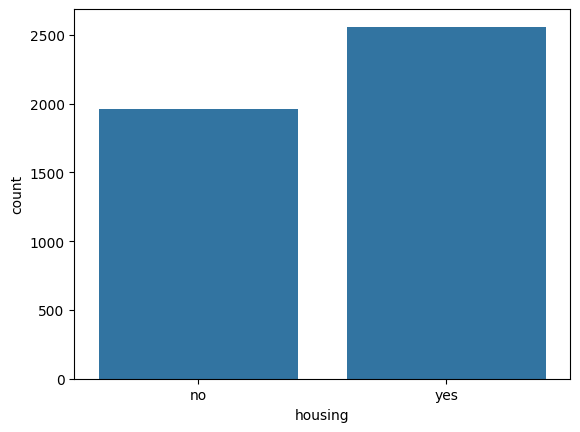

In [10]:
sns.countplot(x = 'housing',data=df)

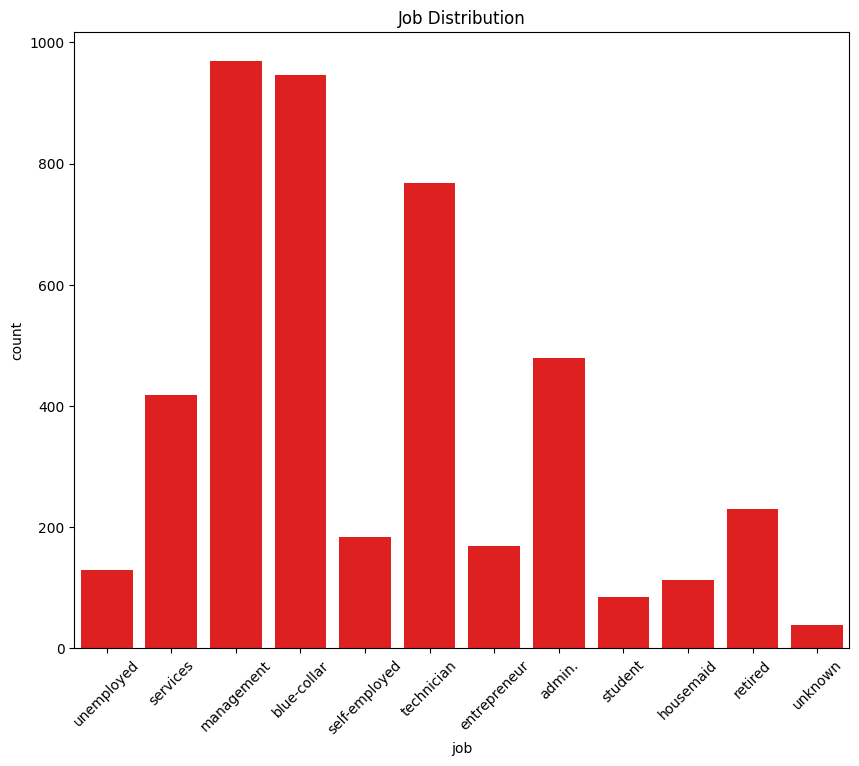

In [11]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='job',data=df, color='red')
ax.set_title('Job Distribution')
ax.set_xlabel('job')
ax.set_ylabel('count')
plt.xticks(rotation=45)
plt.show()

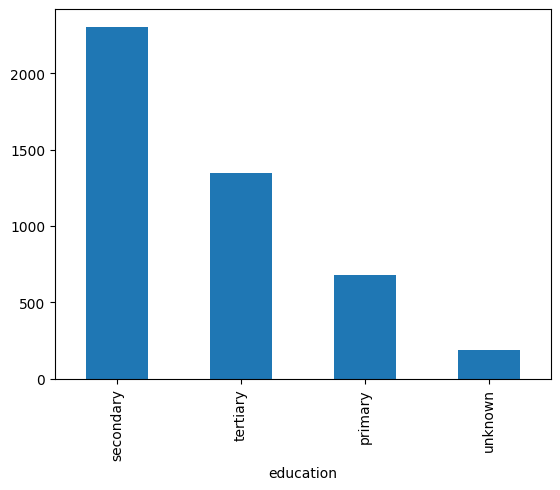

In [12]:
df['education'].value_counts().plot(kind='bar')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_data1=df.apply(lb.fit_transform)
df_data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [14]:
df_data1['loan'].value_counts()

loan
0    3830
1     691
Name: count, dtype: int64

In [15]:
x=df_data1.drop('loan',axis=1)
y=df_data1['loan']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4521, 16)
(4521,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
print(4521*0.25)

1130.25


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 16)
(1131, 16)
(3390,)
(1131,)


In [18]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

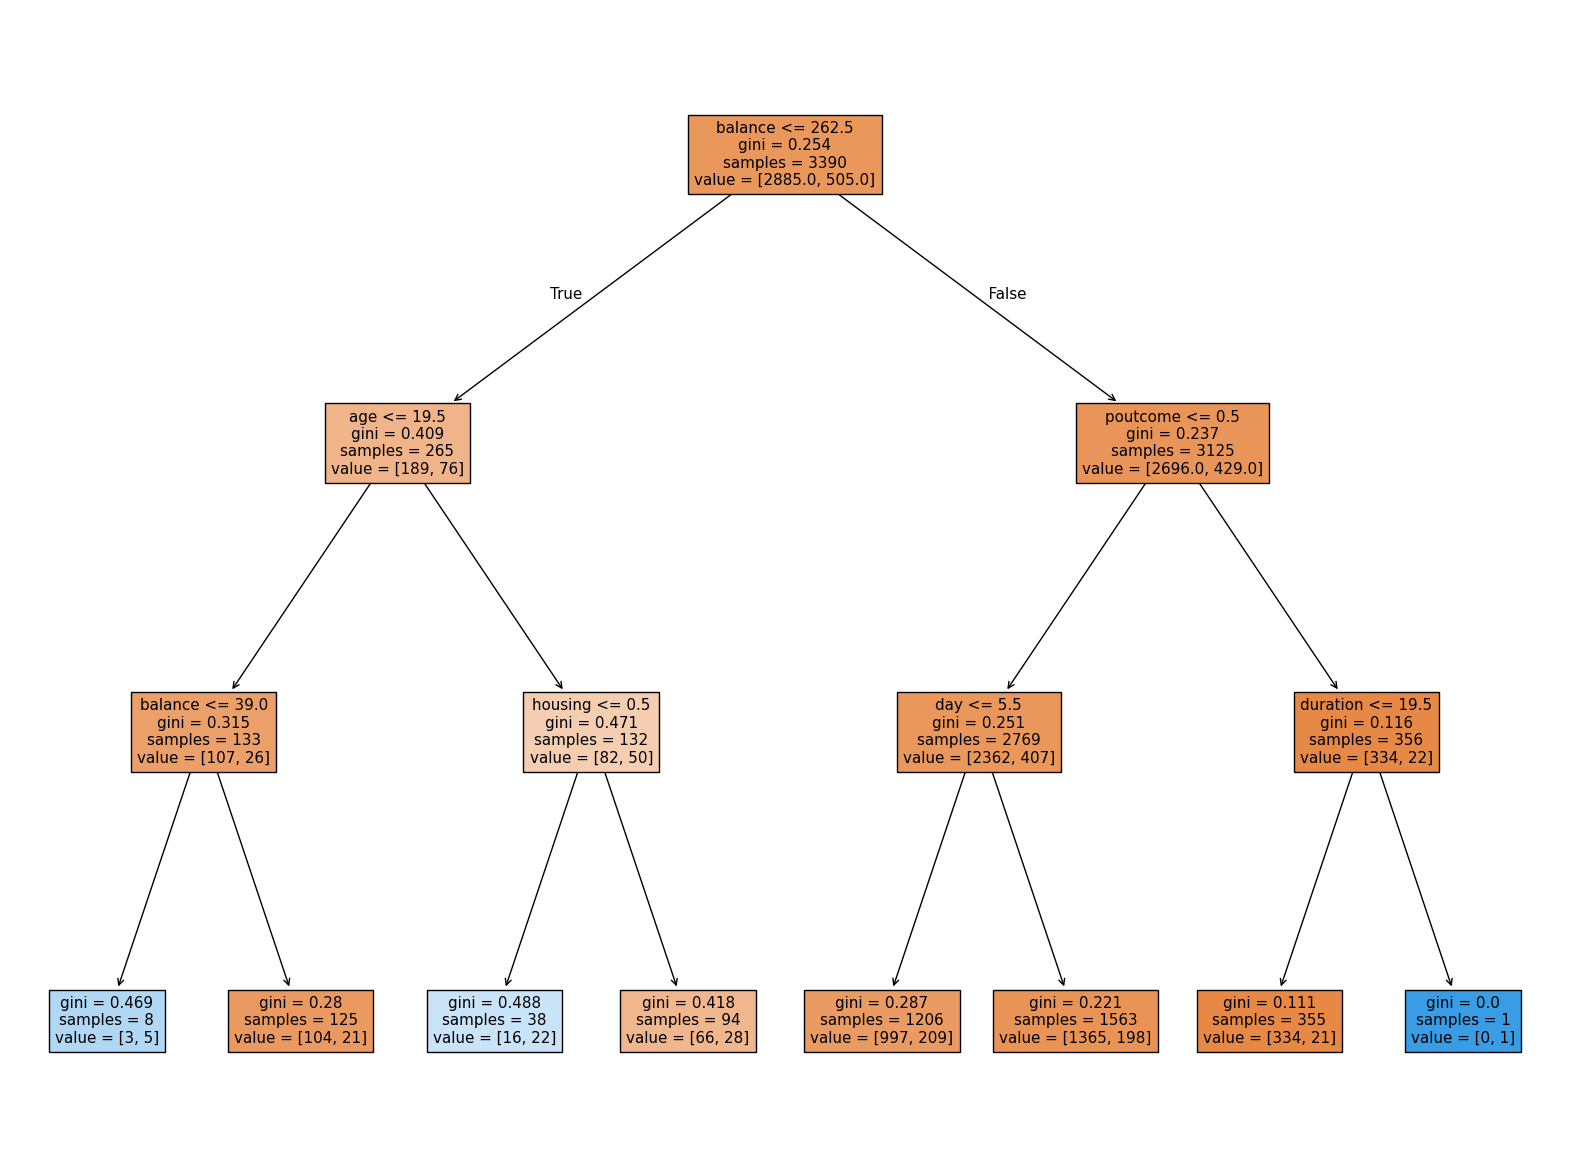

In [21]:
fig=plt.figure(figsize=(20,15))
_=tree.plot_tree(dt, feature_names=df.columns, filled=True)